In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow
!pip install kaggle

## **Prerequisiti: File Api kaggle**
## **Opzionale: Immagini per test**

## **presa del dataset da kaggle**


In [ ]:
!kaggle datasets download -d msambare/fer2013

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import files

# Carica il file kaggle.json scaricato
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"robertobiggi","key":"65a3315c2ead7638b2d4948fececb386"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013

 99% 60.0M/60.3M [00:04<00:00, 20.1MB/s]
100% 60.3M/60.3M [00:04<00:00, 15.2MB/s]


In [ ]:
!unzip fer2013.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating:

## **Analisi**

In [ ]:
import tensorflow as tf
import cv2

import os
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [ ]:
# Definisci il nome di ciascuna classe (nomi delle cartelle delle immagini)
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad', 'surprise']

# Stampa il numero di immagini per ogni classe
folder_path = "/content"
for cls in classes:
    path = os.path.join(folder_path, 'train', cls)
    lst = os.listdir(path)
    number_files = len(lst)
    print(cls, ': ', number_files)

angry :  3995
disgust :  436
fear :  4097
happy :  7215
neutral :  4965
sad :  4830
surprise :  3171


In [ ]:
# Crea una cartella vuota
os.makedirs('new_data')
# Crea la cartella "train" all'interno della cartella new_data
os.makedirs('new_data/train')
# Crea le sottocartelle
for cls in classes:
    os.makedirs('new_data/train/'+cls)

### Bilanciamento

In [ ]:
# Copia 436 file nella nuova cartella
import shutil
import random

num_files = 436

for cls in classes:
    # Percorso della cartella delle immagini di addestramento originale per il riconoscimento delle emozioni facciali
    src_path = os.path.join('/content/', 'train', cls)
    # Percorso della sottocartella
    dst_path = os.path.join('/content/new_data/', 'train', cls)
    src_files = os.listdir(src_path)
    # Seleziona casualmente 436 immagini dalla directory di origine
    src_select_files = random.sample(src_files, num_files)

    # Copia le immagini selezionate nella cartella di destinazione
    for file_name in src_select_files:
        full_file_name = os.path.join(src_path, file_name)
        if os.path.isfile(full_file_name):
            shutil.copy(full_file_name, dst_path)

In [ ]:
# Stampa il numero di immagini per ogni classe
folder_path = "new_data/"
for cls in classes:
    path = os.path.join(folder_path, 'train', cls)
    lst = os.listdir(path)
    number_files = len(lst)
    print(cls, ': ', number_files)

angry :  436
disgust :  436
fear :  436
happy :  436
neutral :  436
sad :  436
surprise :  436


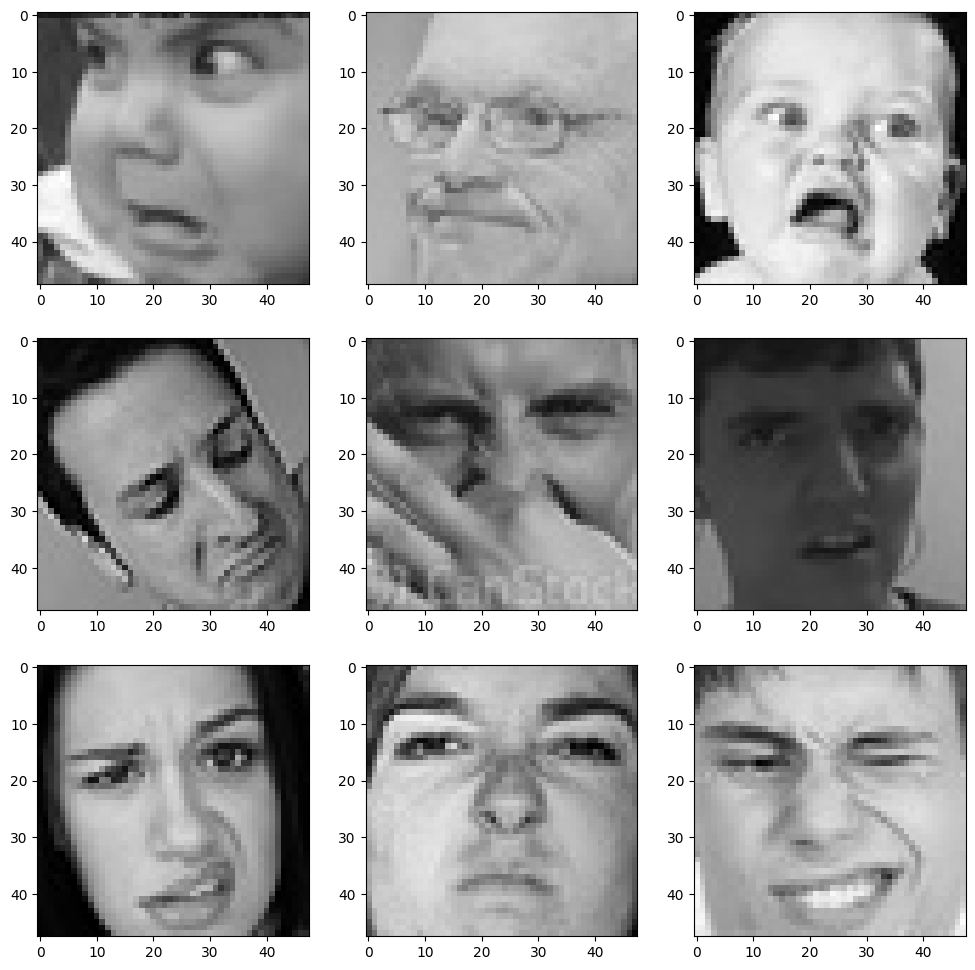

In [ ]:
# Guardiamo le immagini del dataset
picture_size = 48
folder_path = "new_data/"

expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [ ]:
# Funzione per leggere tutte le immagini: ridimensionarle e convertirle in array usando OpenCV

img_size = 224 ## ImageNet => 224x224
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(folder_path, 'train', category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

# Aggiunta per far funzionare il codice
create_training_data()

In [ ]:
temp_array = np.array(training_data)
temp_array.shape

<ipython-input-14-b79b21e7555b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp_array = np.array(training_data)


(3052, 2)

In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimention

print(X.shape)

# Converti in array
Y = np.array(y)

(3052, 224, 224, 3)


## **Modello**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Scarica il modello preaddestrato MobileNet
model = tf.keras.applications.MobileNetV2()

# Stampa l'architettura di MobileNet
model.summary()

14536120/14536120 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

In [ ]:
# Definizione del primo strato come strato di input di Mobilenet
base_input = model.layers[0].input
print(base_input)

# Rimozione dell'ultimo strato del modello MobileNet
base_output = model.layers[-2].output

# Aggiunta di alcuni strati aggiuntivi
final_output = layers.Dense(128)(base_output) ## aggiunta di un nuovo strato, dopo l'output del global pooling layer
final_output = layers.Activation('relu')(final_output) ## funzione di attivazione
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
# Definizione del layer finale con 7 classi
final_output = layers.Dense(7, activation = 'softmax')(final_output)


KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
custom_model = keras.Model(inputs = base_input, outputs = final_output) ## Architettura finale del modello
# Stampa il riepilogo del nostro modello personalizzato
custom_model.summary()

# Compilazione del modello per l'addestramento
custom_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
custom_model.fit(X, Y, epochs = 30, batch_size = 8)

Epoch 1/30
382/382 [==============================] - 52s 47ms/step - loss: 1.8014 - accuracy: 0.2936
Epoch 2/30
382/382 [==============================] - 18s 48ms/step - loss: 1.6222 - accuracy: 0.3676
Epoch 3/30
382/382 [==============================] - 18s 46ms/step - loss: 1.5392 - accuracy: 0.4197
Epoch 4/30
382/382 [==============================] - 18s 46ms/step - loss: 1.4808 - accuracy: 0.4289
Epoch 5/30
382/382 [==============================] - 17s 46ms/step - loss: 1.3899 - accuracy: 0.4679
Epoch 6/30
382/382 [==============================] - 17s 45ms/step - loss: 1.3357 - accuracy: 0.5013
Epoch 7/30
382/382 [==============================] - 18s 47ms/step - loss: 1.2863 - accuracy: 0.5056
Epoch 8/30
382/382 [==============================] - 18s 46ms/step - loss: 1.2471 - accuracy: 0.5233
Epoch 9/30
382/382 [==============================] - 17s 45ms/step - loss: 1.1937 - accuracy: 0.5505
Epoch 10/30
382/382 [==============================] - 17s 45ms/step - loss: 1.123

In [ ]:
custom_model.save('facial_expression_saved_model')

In [ ]:
custom_model.save('facial_expression_model.keras')

## **Test modello**

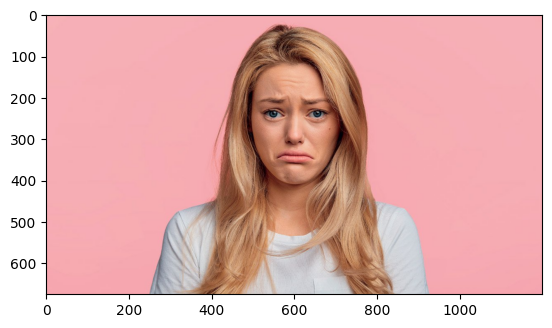

In [ ]:
# Leggi l'immagine di test scaricata in OpenCV
test_img = cv2.imread('test.jpg')
# Fai un backup dell'immagine di input prima della rilevazione del viso
img_bcp = test_img.copy()

# Mostra l'immagine in OpenCV
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

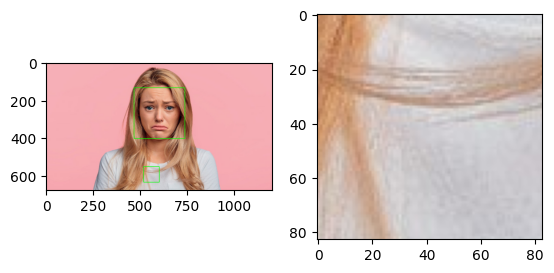

In [ ]:
# Definisci il classificatore di cascata di Haar per la rilevazione del viso
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Converti l'immagine in scala di grigi in OpenCV
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

# Rileva il viso usando il classificatore di cascata di Haar
faces_coordinates = face_classifier.detectMultiScale(gray_img)

# Disegna un rettangolo intorno ai volti
for (x, y, w, h) in faces_coordinates:

    cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Ritaglia il viso dall'immagine
    cropped_face = img_bcp[y:y+h, x:x+w]

# Mostra l'immagine originale
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

# Mostra l'immagine ritagliata dopo aver eseguito la rilevazione del viso
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))

In [ ]:
# Creazione del dizionario delle classi
class_dictionary = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

final_image = cv2.resize(cropped_face, (224,224))
final_image = np.expand_dims(final_image, axis=0) ## Necessario per la quarta dimensione
final_image = final_image/255.0 ## Normalizzazione

# Carica il modello
new_model = tf.keras.models.load_model('facial_expression_model.keras')
prediction = new_model.predict(final_image)
class_dictionary[np.argmax(prediction)]

1/1 [==============================] - 1s 974ms/step


'sad'